In [1]:
import cv2 
import os 
import glob 
from numpy import asarray
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#from skimage.feature import hog
#from skimage import exposure
img_dir = "D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases" # Enter Directory of all images 

data_path = os.path.join(img_dir,'Malignant case*') 
files = glob.glob(data_path) 

data = [] 

original_data=[]
for f1 in files: 
    img = cv2.imread(f1) 
    v=img
    #make all images (512,512)
    img = cv2.resize(img, (224, 224))
    #remove noise
    img = cv2.GaussianBlur(img,(5,5),0)
   
    
    array = asarray(img)
    #see edges 
    img=Image.fromarray((array))
    final= img.filter(ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 8,-1, -1, -1, -1), 1, 0))
    img=final+array  
    img=Image.fromarray((img))
    #img = img.filter(ImageFilter.FIND_EDGES)
    # Convert the image to grayscale
    img = img.convert("L")
    img = asarray(img)
    #segmnation
    ret, img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
    #d, img = hog(img, orientations=9 ,pixels_per_cell=(4, 4)
    #                ,cells_per_block=(2, 2), visualize=True)# multichannel=True
    #img = exposure.rescale_intensity(img, in_range=(0, 10)) 
 
    #append in=mage in data
    data.append(img)
    original_data.append(v)
data

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0

In [2]:
print(files)

['D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (1).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (10).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (100).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (101).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (102).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (103).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (104).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (105).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (106).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (107).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (108).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (109).

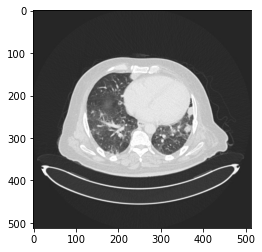

In [3]:
plt.imshow(original_data[10])

In [4]:
img_dir_n = "D:\\dataset_lung_cancer_19_11_2021\\m\\Normal cases" # Enter Directory of all images
data_path_n = os.path.join(img_dir_n,'*g') 
files_n = glob.glob(data_path_n) 
data_n = []
original_data_n=[]
for f2 in files_n: 
    img_n = cv2.imread(f2) 
    
    v_n=img_n
    #make all images (512,512)
    img_n = cv2.resize(img_n, (224, 224))
    #remove noise
    img_n = cv2.GaussianBlur(img_n,(5,5),0)
   
    
    array_n = asarray(img_n)
    #see edges 
    img_n=Image.fromarray((array_n))
    final_n= img_n.filter(ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 8,-1, -1, -1, -1), 1, 0))
    img_n=final_n+array_n  
    img_n=Image.fromarray((img_n))
    #img = img.filter(ImageFilter.FIND_EDGES)
    # Convert the image to grayscale
    img_n = img_n.convert("L")
    img_n = asarray(img_n)
    ret, img_n = cv2.threshold(img_n, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
    #feature extraction using hog
#     d, img_n = hog(img_n, orientations=9 ,pixels_per_cell=(4, 4)
#                    ,cells_per_block=(2, 2), visualize=True)# multichannel=True
#    img_n = exposure.rescale_intensity(img_n, in_range=(0, 10)) 
 
    #append in=mage in data
    data_n.append(img_n)
    original_data_n.append(v_n)
data_n

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0

In [5]:
data[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
data_n[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
#lenght of data_n 
x = len(data_n)
x

416

In [8]:
#lenght of data
y = len(data)
y

561

In [9]:
#to make label_normal zeros
label_n=np.zeros(x)
n = len(label_n)
label_n

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [10]:
#normal case lenght
n

416

In [11]:
#to make label_Malignantl ones
label=np.ones(y)
m = len(label)
label

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [12]:
# Malignant case lenght
m

561

In [13]:
#concatenate to make general array have all cases normal and Malignant 0/1
genaral_labels=np.concatenate((label,label_n ), axis=None)
genaral_labels[3]

1.0

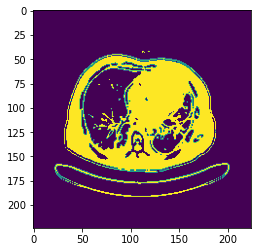

In [14]:
#concatenate to make general array have all cases normal and Malignant images
genaral_data=data+data_n
genaral_data[973]
plt.imshow(genaral_data[0])

In [15]:
o = len(genaral_data)
o

977

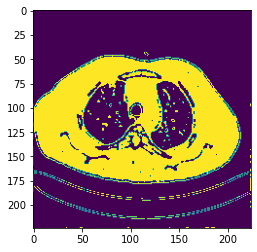

In [16]:
plt.imshow(genaral_data[700])

In [17]:
img.shape

(224, 224)

In [18]:
#make all images (512,512)
#img = cv2.resize(img, (512, 512))

In [19]:
#remove noise
#x = cv2.GaussianBlur(data[0],(5,5),0)
#x

In [20]:
ddepth = cv2.CV_16S
kernel_size = 3
data[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:

#src_gray = cv2.cvtColor(data[0], cv2.COLOR_BGR2GRAY)
#src_gray



In [22]:
#plt.imshow(src_gray)

In [23]:
#dst = cv2.Laplacian(src_gray, ddepth, ksize=kernel_size)
#dst

In [24]:
#plt.imshow(dst)

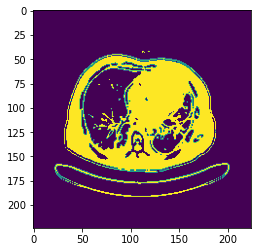

In [25]:
ret, thresh1 = cv2.threshold(data[0], 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
plt.imshow(thresh1)

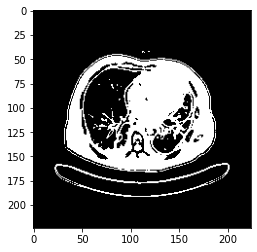

In [26]:
import cv2
import numpy as np

ret, thresh4 = cv2.threshold(data[0], 110, 255, cv2.THRESH_TOZERO)

 
# the window showing output images
# with the corresponding thresholding
# techniques applied to the input images

plt.imshow(thresh4,cmap='gray')


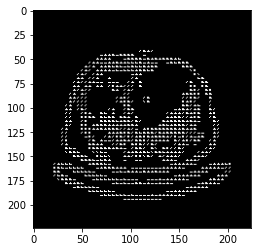

(0.0, 1.0, 0.0, 1.0)

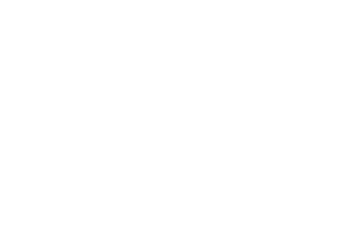

In [27]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

fd, hog_image = hog(data[0], orientations=9 ,pixels_per_cell=(4, 4)
                    ,cells_per_block=(2, 2), visualize=True)# multichannel=True
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 
plt.imshow(hog_image_rescaled, cmap=plt.cm.gray) 

plt.show()
plt.axis("off")
#plt.imshow(hog_image)

In [28]:
x=np.array(genaral_data)
genaral_data=x
x.shape
x[500]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(genaral_data, genaral_labels, test_size=0.2)
print(len(X_train),"train +",len(y_test),"test")

781 train + 196 test


In [30]:
y_train.shape

(781,)

In [31]:
X_train.shape

(781, 224, 224)

In [32]:
genaral_data.shape

(977, 224, 224)

In [33]:
nsamples, nx, ny = X_train.shape
d2_train_x = X_train.reshape((nsamples,nx*ny))
d2_train_x.shape

(781, 50176)

In [34]:
X_train.shape

(781, 224, 224)

In [35]:
X_test.shape

(196, 224, 224)

In [36]:
nsamples, nx, ny = X_test.shape
d2_test = X_test.reshape((nsamples,nx*ny))
d2_test.shape

(196, 50176)

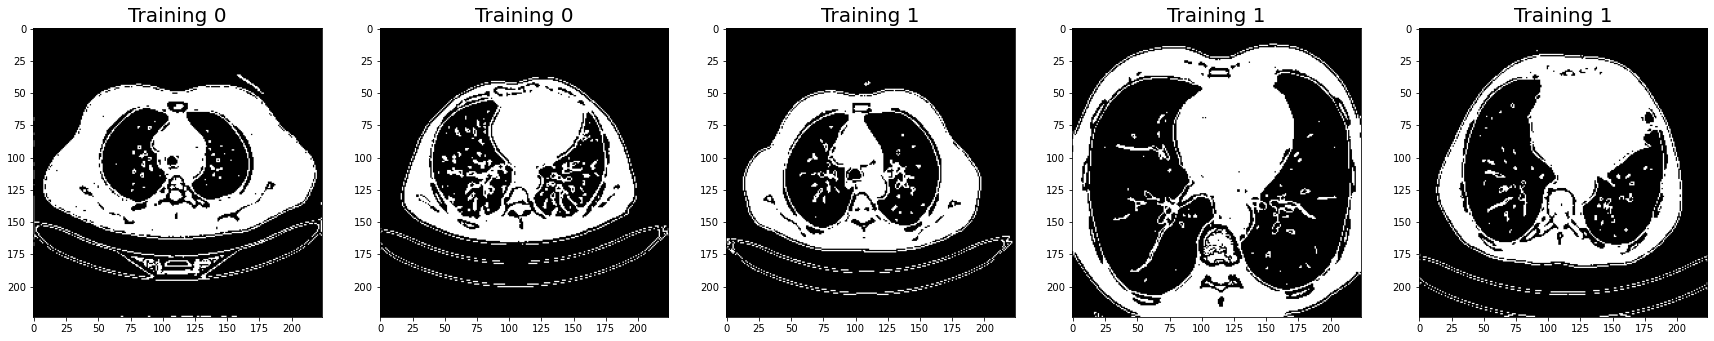

In [37]:
plt.figure(figsize=(30,20))
for index,(genaral_data, genaral_labels) in enumerate(zip(X_train[0:5],y_train[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(genaral_data,(224,224)),cmap='gray')
    plt.title('Training %d' % genaral_labels,fontsize=20)
    plt.plot()

In [38]:
#genaral_data, genaral_labels
from skimage.transform import  resize
import numpy as np
data_new = np.zeros((len(genaral_data),224,224,3))
for i in range(len(genaral_data)):
  image = genaral_data[i]
  image_resize =  resize(image, (224, 224,3), anti_aliasing=True)
  data_new[i] = image_resize
data_new.shape

(224, 224, 224, 3)

In [43]:
import sys



from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.models import load_model
import numpy as np


from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
cnn = Sequential()
model = Sequential()

model.add(LSTM(30, input_shape=(224, 224)))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='softmax'))


In [44]:
X_train.shape

(781, 224, 224)

In [45]:
model.compile(loss='categorical_crossentropy',
                      optimizer='rmsprop',
                      metrics=['accuracy'])

In [46]:


model.fit(X_train,y_train,
                  batch_size=10, epochs=100, shuffle=False)

Epoch 1/100
79/79 [==============================] - 8s 71ms/step - loss: 0.0000e+00 - accuracy: 0.5672 1s - los
Epoch 2/100
79/79 [==============================] - 7s 85ms/step - loss: 0.0000e+00 - accuracy: 0.5672
Epoch 3/100
79/79 [==============================] - 6s 77ms/step - loss: 0.0000e+00 - accuracy: 0.5672
Epoch 4/100
79/79 [==============================] - 6s 73ms/step - loss: 0.0000e+00 - accuracy: 0.5672
Epoch 5/100
79/79 [==============================] - 6s 73ms/step - loss: 0.0000e+00 - accuracy: 0.5672
Epoch 6/100
79/79 [==============================] - 6s 75ms/step - loss: 0.0000e+00 - accuracy: 0.5672
Epoch 7/100
79/79 [==============================] - 7s 91ms/step - loss: 0.0000e+00 - accuracy: 0.5672
Epoch 8/100
79/79 [==============================] - 7s 87ms/step - loss: 0.0000e+00 - accuracy: 0.5672
Epoch 9/100
79/79 [==============================] - 6s 79ms/step - loss: 0.0000e+00 - accuracy: 0.5672 0s - loss: 0.0000e+00 - accuracy: 0.56
Epoch 10/100
79/

In [49]:
_, acc = model.evaluate(X_test, y_test, verbose=2)
print('> %.3f' % (acc * 100.0))

7/7 - 0s - loss: 0.0000e+00 - accuracy: 0.6020 - 220ms/epoch - 31ms/step
> 60.204


In [ ]:
#genaral_data, genaral_labels
# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

# number of input columns
n_inputs = genaral_data.shape[1]
#X_train, X_test, y_train, y_test


# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input

history = model.fit(trainX, trainX, epochs=200, batch_size=16, verbose=2, validation_data=(testX,testX))

# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [ ]:
n_inputs

In [ ]:
n_inputs = genaral_data.shape[1]
n_inputs

In [ ]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)#X_train, X_test, y_train, y_test


In [ ]:
X_train, X_test, y_train, y_test 

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input ,decode_predictions

In [ ]:
model=VGG16()

In [ ]:
model.summary()